# HW02: Tokenization

Remember that these homework work as a completion grade. **You can skip one section without losing credit.**

In [ ]:
#Import the AG news dataset (same as hw01)
#Download them from here 
!wget https://raw.githubusercontent.com/mhjabreel/CharCnn_Keras/master/data/ag_news_csv/train.csv

import pandas as pd
import nltk
df = pd.read_csv('train.csv')

df.columns = ["label", "title", "lead"]
label_map = {1:"world", 2:"sport", 3:"business", 4:"sci/tech"}
def replace_label(x):
	return label_map[x]
df["label"] = df["label"].apply(replace_label) 
df["text"] = df["title"] + " " + df["lead"]
df.head()

--2023-03-01 16:35:32--  https://raw.githubusercontent.com/mhjabreel/CharCnn_Keras/master/data/ag_news_csv/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29470338 (28M) [text/plain]
Saving to: ‘train.csv.1’

train.csv.1         100%[===================>]  28.10M   185MB/s    in 0.2s    

2023-03-01 16:35:34 (185 MB/s) - ‘train.csv.1’ saved [29470338/29470338]



,label,title,lead,text
0,business,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...,Carlyle Looks Toward Commercial Aerospace (Reu...
1,business,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...,Oil and Economy Cloud Stocks' Outlook (Reuters...
2,business,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...,Iraq Halts Oil Exports from Main Southern Pipe...
3,business,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco...","Oil prices soar to all-time record, posing new..."
4,business,"Stocks End Up, But Near Year Lows (Reuters)",Reuters - Stocks ended slightly higher on Frid...,"Stocks End Up, But Near Year Lows (Reuters) Re..."


## Preprocess Text

In [ ]:
import spacy
dfs = df.sample(50)
nlp = spacy.load('en_core_web_sm')

##TODO use spacy to split the documents in the sampled dataframe (dfs) in sentences and tokens

def split_doc(text):
    '''
    Returns -> tuple:
    1. list -> sentences
    2. list -> tokens
    '''
    doc = nlp(text)
    sentences = [sent for sent in doc.sents]
    tokens = [token for token in doc if not token.is_punct and not token.is_stop]

    return sentences, tokens

# '*' iterates over each single sample of dfs
dfs['sentences'], dfs['tokens'] = zip(*dfs['text'].apply(split_doc))

##TODO print the first sentence of the first document in your sample

print(dfs.iloc[0]['sentences'][0])

O #39;Connell will try to jump-start Aztecs #39; season Searching for a way to stop the bleeding, Tom Craft yesterday officially replaced a quarterback who is hurting and has been ineffective.


In [ ]:
dfs.head()

,label,title,lead,text,sentences,tokens
64618,sport,O #39;Connell will try to jump-start Aztecs #3...,"Searching for a way to stop the bleeding, Tom ...",O #39;Connell will try to jump-start Aztecs #3...,"[(O, #, 39;Connell, will, try, to, jump, -, st...","[O, 39;Connell, try, jump, start, Aztecs, 39, ..."
65161,sci/tech,Microsoft Sets Licensing Policy for New Chips ...,Reuters - Microsoft Corp. on\Tuesday agreed t...,Microsoft Sets Licensing Policy for New Chips ...,"[(Microsoft, Sets, Licensing, Policy, for, New...","[Microsoft, Sets, Licensing, Policy, New, Chip..."
106210,business,Row over Airbus boss intensifies,French and German executives are in a bitter d...,Row over Airbus boss intensifies French and Ge...,"[(Row, over, Airbus, boss, intensifies, French...","[Row, Airbus, boss, intensifies, French, Germa..."
112025,sci/tech,Samsung Doubles Memory Density,"According to a Samsung release, the device is ...",Samsung Doubles Memory Density According to a ...,"[(Samsung, Doubles, Memory, Density), (Accordi...","[Samsung, Doubles, Memory, Density, According,..."
1579,business,Lojack makes Canada move with Boomerang buy,The Westwood company is spending \$48 million ...,Lojack makes Canada move with Boomerang buy Th...,"[(Lojack, makes, Canada, move, with, Boomerang...","[Lojack, makes, Canada, Boomerang, buy, Westwo..."


In [ ]:
##TODO create a new column with tokens in lowercase (x.lower()), without punctuation tokens (x.is_punct), stopwords (x.is_stop), and digits (x.is_digit)


def tokens_to_text(sample_of_tokens):
    tokens_text = [token.text.lower() for token in sample_of_tokens]

    return tokens_text

dfs['tokens_text'] = dfs['tokens'].apply(tokens_to_text)

##TODO print the tokens (x.lemma_) and the dependency labels (x.dep_ ) of the first sentence of the first document (doc.sents)

print(dfs.iloc[0]['sentences'][0])

for token in dfs.iloc[0]['sentences'][0]:
    print('token: {:15}, lemma: {:15}, dependency: {}'.format(token.text, token.lemma_, token.dep_))


O #39;Connell will try to jump-start Aztecs #39; season Searching for a way to stop the bleeding, Tom Craft yesterday officially replaced a quarterback who is hurting and has been ineffective.
token: O              , lemma: o              , dependency: intj
token: #              , lemma: #              , dependency: nmod
token: 39;Connell     , lemma: 39;connell     , dependency: nsubj
token: will           , lemma: will           , dependency: aux
token: try            , lemma: try            , dependency: ccomp
token: to             , lemma: to             , dependency: aux
token: jump           , lemma: jump           , dependency: xcomp
token: -              , lemma: -              , dependency: punct
token: start          , lemma: start          , dependency: dep
token: Aztecs         , lemma: Aztecs         , dependency: dobj
token: #              , lemma: #              , dependency: nmod
token: 39             , lemma: 39             , dependency: dobj
token: ;              , le

### Named Entities

Let's compute the ratio of named entities starting with a capital letter, e.g. if we have "University of Chicago" as a NE, "University" and "Chicago" are capitalized, "of" is not, thus the ratio is 2/3.

In [ ]:
##TODO print the ratio of tokens being part of a named entity span starting with a capital letter (doc.ents)

for sample in dfs['sentences']:
    for sentence in sample:
        for ent in sentence.ents:
            cap_ent = 0
            total_ent = len(ent)

            for word in ent:
                if word.text[0].isupper():
                    cap_ent += 1
          
            
            if total_ent > 0:
                print('{:<40} ratio: {}'.format(ent.text, cap_ent/total_ent))

            else:
                print('{:<40} ratio: 0.0'.format(ent.text))


39;Connell                               ratio: 0.0
39                                       ratio: 0.0
Tom Craft                                ratio: 1.0
yesterday                                ratio: 0.0
Microsoft Sets Licensing Policy for New Chips ratio: 0.8571428571428571
Reuters                                  ratio: 1.0
Reuters                                  ratio: 1.0
Microsoft Corp.                          ratio: 1.0
Airbus                                   ratio: 1.0
French                                   ratio: 1.0
German                                   ratio: 1.0
EADS                                     ratio: 1.0
Samsung Doubles Memory Density           ratio: 1.0
Samsung                                  ratio: 1.0
DRAM                                     ratio: 1.0
Canada                                   ratio: 1.0
Boomerang                                ratio: 1.0
\$48 million                             ratio: 0.0
Boomerang Tracking Inc.                  rat

In [ ]:
##TODO print the ratio of capitalized tokens not being part of a named entity span (have no token.ent_type_)
# e.g. "The dog barks" = 1/3; 3 tokens, only "The" is capitalized

for sample in dfs['tokens']:

    cap_not_ent = 0
    tot_cap = 0

    for token in sample:
        if token.text[0].isupper() and not token.ent_type_:
            cap_not_ent += 1
        
        if token.text[0].isupper():
            tot_cap += 1

    if tot_cap > 0:
        print('Ratio: {}'.format(cap_not_ent / tot_cap))
    
    else:
        print('Ratio: 0.0')

Ratio: 0.6
Ratio: 0.0
Ratio: 0.2
Ratio: 0.14285714285714285
Ratio: 0.2222222222222222
Ratio: 0.2857142857142857
Ratio: 0.5
Ratio: 0.6428571428571429
Ratio: 0.7777777777777778
Ratio: 0.23076923076923078
Ratio: 0.6666666666666666
Ratio: 0.4
Ratio: 0.35714285714285715
Ratio: 0.2
Ratio: 0.3
Ratio: 0.7777777777777778
Ratio: 0.1111111111111111
Ratio: 1.0
Ratio: 0.4166666666666667
Ratio: 0.4
Ratio: 0.2
Ratio: 0.0
Ratio: 0.0
Ratio: 0.36363636363636365
Ratio: 0.2222222222222222
Ratio: 0.0
Ratio: 0.4
Ratio: 0.5
Ratio: 0.0
Ratio: 1.0
Ratio: 0.0625
Ratio: 0.0
Ratio: 0.36363636363636365
Ratio: 0.14285714285714285
Ratio: 0.16666666666666666
Ratio: 0.2222222222222222
Ratio: 0.0
Ratio: 0.8571428571428571
Ratio: 0.5555555555555556
Ratio: 0.2222222222222222
Ratio: 0.2
Ratio: 0.2
Ratio: 0.0
Ratio: 0.3
Ratio: 0.1
Ratio: 0.1
Ratio: 0.4375
Ratio: 0.0
Ratio: 0.0
Ratio: 0.3076923076923077


In [ ]:
##TODO print the ratio of capitalized tokens not being a named entity and not being the first token in a sentence
# e.g. "The dog barks" = 0; 3 tokens, "The" is capitalized but the starting token of a sentence, no other tokens are capitalized.

for sample in dfs['sentences']:

    for j, sentence in enumerate(sample):

        cap_not_ent_not_first = 0
        tot_cap = 0

        print(f'Sentence {j+1}: ', end='')

        for i, token in enumerate(sentence):
    

            if i > 0 and token.text[0].isupper() and not token.ent_type_:
                cap_not_ent_not_first += 1
            
            if i > 0 and token.text[0].isupper():
                tot_cap += 1



        if tot_cap > 0:
            print('Ratio: {} '.format(cap_not_ent_not_first / tot_cap), end='')
        
        else:
            print('Ratio: 0.0 ', end='')

    print()



Sentence 1: Ratio: 0.5 
Sentence 1: Ratio: 0.0 
Sentence 1: Ratio: 0.0 
Sentence 1: Ratio: 0.0 Sentence 2: Ratio: 0.0 
Sentence 1: Ratio: 0.2222222222222222 
Sentence 1: Ratio: 0.16666666666666666 
Sentence 1: Ratio: 0.6666666666666666 Sentence 2: Ratio: 0.0 
Sentence 1: Ratio: 0.6428571428571429 
Sentence 1: Ratio: 1.0 Sentence 2: Ratio: 0.3333333333333333 
Sentence 1: Ratio: 0.23076923076923078 
Sentence 1: Ratio: 0.5 
Sentence 1: Ratio: 0.4 Sentence 2: Ratio: 0.0 
Sentence 1: Ratio: 0.625 Sentence 2: Ratio: 0.0 
Sentence 1: Ratio: 0.2 
Sentence 1: Ratio: 0.2222222222222222 
Sentence 1: Ratio: 0.8 
Sentence 1: Ratio: 0.2 
Sentence 1: Ratio: 1.0 
Sentence 1: Ratio: 0.36363636363636365 
Sentence 1: Ratio: 0.5 Sentence 2: Ratio: 0.0 Sentence 3: Ratio: 0.0 
Sentence 1: Ratio: 0.3 
Sentence 1: Ratio: 0.0 
Sentence 1: Ratio: 0.0 
Sentence 1: Ratio: 0.6 Sentence 2: Ratio: 0.0 
Sentence 1: Ratio: 0.25 Sentence 2: Ratio: 0.0 
Sentence 1: Ratio: 0.0 Sentence 2: Ratio: 0.0 
Sentence 1: Ratio: 0

Give an example of a capitalized token in the data which is neither a named entity nor at the start of a sentence. What could be the reason the token is capitalized (one sentence)?

In [ ]:
print(dfs.iloc[0]['sentences'])

for sentence in dfs.iloc[0]['sentences']:
    
    for token in sentence:

        if i > 0 and token.text[0].isupper() and not token.ent_type_:
            print(token)


[O #39;Connell will try to jump-start Aztecs #39; season Searching for a way to stop the bleeding, Tom Craft yesterday officially replaced a quarterback who is hurting and has been ineffective.]
O
Aztecs
Searching


Either the token is a number which is counted as capitalised character or the word is a name. In this case we got 0 as the number and Aztecs. Searching seems to be a spelling mistake as it does not seem like a name.

## Term Frequencies

In [ ]:
print(df['label'].value_counts())

sci/tech    30000
sport       30000
world       30000
business    29999
Name: label, dtype: int64


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


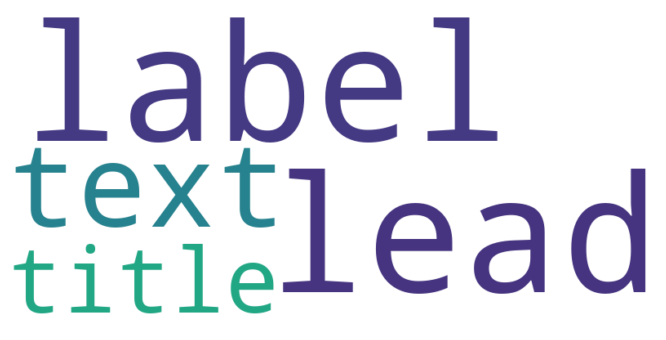

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(min_df=0.01, 
                        max_df=0.9,  
                        max_features=1000,
                        stop_words='english',
                        use_idf=True, # the new piece
                        ngram_range=(1,2))

from wordcloud import WordCloud
import matplotlib.pyplot as plt

##TODO using the whole sample, produce a world cloud with bigrams for label == business using tfidf frequencies

df_bus = df.loc[df['label'] == 'business']


tfidf.fit(df_bus)


feature_names = tfidf.get_feature_names_out()
tfidf_scores = tfidf.idf_

# Create a dictionary with the feature names and their corresponding TF-IDF scores
wordcloud_dict = dict(zip(feature_names, tfidf_scores))

# Create a word cloud
wordcloud = WordCloud(background_color="white", width=800, height=400).generate_from_frequencies(wordcloud_dict)

# Plot the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()




## Supervised Feature Selection

In [42]:
from sklearn.feature_selection import SelectKBest, f_classif, chi2

##TODO compute the number of words per document (excluding stopwords)

import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

en_stop_words = stopwords.words('english')

text_no_stop_words = df['text'].apply(lambda x: ' '.join([word for word in x.lower().split() if word not in en_stop_words]))
num_words_per_document = text_no_stop_words.apply(lambda x: len(x.split()))

num_words_per_document.head()

##TODO get the most predictive features of the number of words per document using first f_class and then chi2

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


0    26
1    25
2    28
3    31
4    31
Name: text, dtype: int64

Are the results different? What could be a reason for this? 

## Huggingface Tokenizers

In [ ]:
# # we use distilbert tokenizer
# !pip install transformers
from transformers import DistilBertTokenizerFast

# let's instantiate a tokenizer
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')

##TODO tokenize the sentences in the sampled dataframe (dfs) using the DisilBertTokenizer
##TODO what is the type/token ratio from this tokenizer (number_of_unqiue_token_types/number_of_tokens)?
##TODO what is the amount of subword tokens returned by the huggingface tokenizer? hint: each subword token starts with "#"



# Parsing

In [ ]:
import pandas as pd
import nltk
df = pd.read_csv('train.csv')

df.columns = ["label", "title", "lead"]
label_map = {1:"world", 2:"sport", 3:"business", 4:"sci/tech"}
def replace_label(x):
	return label_map[x]
df["label"] = df["label"].apply(replace_label) 
df["text"] = df["title"] + " " + df["lead"]
df = df.sample(n=10000) # # only use 10K datapoints
df.head()

,label,title,lead,text
110581,sport,UEFA to probe Valencia-Werder Bremen incidents,UEFA will be launching disciplinary proceeding...,UEFA to probe Valencia-Werder Bremen incidents...
15925,sci/tech,New iMac tries to play it cool,Hot G5 chip requires some serious effort to av...,New iMac tries to play it cool Hot G5 chip req...
46720,business,Ford Reports Disappointing U.S. Sales,Ford's car and truck business sales fell nearl...,Ford Reports Disappointing U.S. Sales Ford's c...
57350,sci/tech,Microsoft Upgrades Windows XP Media Center (Ne...,NewsFactor - Bill Gates is about to announce a...,Microsoft Upgrades Windows XP Media Center (Ne...
90601,sport,Rams make statement they #39;re team to beat i...,ST. LOUIS -- When St. Louis coach Mike Martz l...,Rams make statement they #39;re team to beat i...


In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')
#TODO preprocess the corpus using spacy


### Information Extraction

In [ ]:
def extract_subject_verb_pairs(sent):
    subjs = [w for w in sent if w.dep_ == "nsubj"]
    pairs = [(w.lemma_.lower(), w.head.lemma_.lower()) for w in subjs]
    return pairs
##TODO extract the subject-verbs pairs and print the result for the second document

from collections import Counter
counter = Counter()

##TODO create a list ranking the most common pairs and print the first 10 items

In [ ]:
##TODO do the same for verbs-object pairs ('dobj')
##TODO create a list ranking the most common pairs and print the first 10 items

In [ ]:
##TODO do the same for adjectives-nouns pairs ('amod')
##TODO create a list ranking the most common pairs and print the first 10 items

### Exploring cross label dependencies

In [ ]:
##TODO extract all the subject-verbs and verbs-object pairs for the verb "rise"

In [ ]:
##TODO for each label create a list ranking the most common subject-verbs pairs and one for the most common verbs-object pairs
##TODO print the 10 most common pairs for each of the two lists for the labels "world" and "sci/tech"